In [ ]:
import os

# Create project directories
os.makedirs('/content/project_root/data/input_images', exist_ok=True)
os.makedirs('/content/project_root/data/segmented_objects', exist_ok=True)
os.makedirs('/content/project_root/data/output', exist_ok=True)

os.makedirs('/content/project_root/models', exist_ok=True)
os.makedirs('/content/project_root/utils', exist_ok=True)
os.makedirs('/content/project_root/streamlit_app/components', exist_ok=True)

os.makedirs('/content/project_root/tests', exist_ok=True)


<h1> image segmentation<h1/>

In [ ]:
import os
HOME =os.getcwd()
print("HOME:",HOME)

HOME: /content


In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-buecjbk2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-buecjbk2
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [ ]:
%cd {HOME}
!MKDIR {HOME}/weights
%cd {HOME}/weights
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

/content
/bin/bash: line 1: MKDIR: command not found
[Errno 2] No such file or directory: '/content/weights'
/content
--2024-08-21 00:19:24--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.72, 18.164.78.128, 18.164.78.81, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  5.57MB/s    in 70s     

2024-08-21 00:20:33 (35.1 MB/s) - ‘sam_vit_h_4b8939.pth.1’ saved [2564550879/2564550879]

--2024-08-21 00:20:33--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.35, 18.165.83.44, 18.165.83.79, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.35|:443...

In [ ]:
%cd {HOME}
!pip install torch

/content


In [ ]:
!pip install torchvision

In [ ]:
!pip install supervision

In [ ]:
!pip install opencv-python

In [ ]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)

Device: cpu


In [ ]:
import os
%cd {HOME}

MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/content/sam_vit_h_4b8939.pth"
print(CHECKPOINT_PATH, "; exits:",os.path.isfile(CHECKPOINT_PATH))

/content
/content/sam_vit_h_4b8939.pth ; exits: True


In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
import cv2
image_bgr = cv2.imread("project_root/data/image/27DUSK1-superJumbo.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
original_image = image_rgb
print(image_bgr.shape)
image_rgb = cv2.resize(image_rgb, (1024,1024), interpolation=None)
image_bgr = cv2.resize(image_bgr, (1024,1024), interpolation=None)
original_image = cv2.resize(original_image, (1024,1024), interpolation=None)
print(image_rgb.shape)

(1365, 2048, 3)
(1024, 1024, 3)


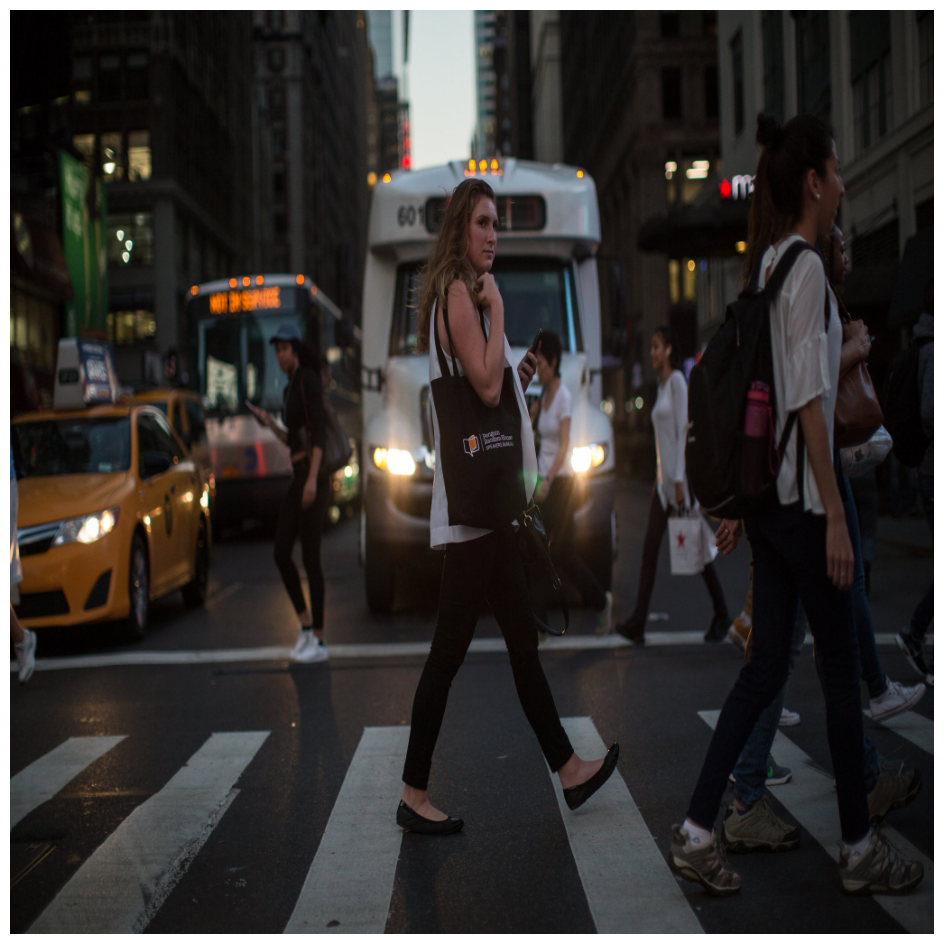

In [ ]:
import supervision as sv
sv.plot_image(image_bgr)


In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_rgb)
print(result[0].keys())


dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [ ]:
print(len(result))

213


In [ ]:
bboxes = []
points = []
segmentations = []
areas = []

#understanding the result parameters & draw all segmentations
for mask in result:
    bboxes.append(mask['bbox'])
    points.append(mask['point_coords'])
    segmentations.append(mask['segmentation'])
    areas.append(mask['area'])
    print(mask['bbox'])


[748, 257, 138, 307]
[3, 437, 219, 253]
[435, 570, 188, 294]
[0, 804, 128, 104]
[48, 363, 72, 79]
[303, 794, 138, 229]
[750, 548, 202, 372]
[930, 0, 46, 155]
[17, 799, 269, 224]
[813, 114, 99, 185]
[4, 451, 129, 66]
[600, 783, 169, 240]
[466, 332, 106, 243]
[442, 0, 73, 174]
[435, 385, 207, 479]
[750, 253, 196, 659]
[7, 643, 58, 31]
[269, 0, 135, 341]
[867, 0, 42, 124]
[710, 399, 41, 153]
[930, 0, 44, 78]
[75, 365, 44, 70]
[866, 148, 58, 112]
[390, 163, 280, 504]
[48, 363, 35, 78]
[82, 621, 30, 43]
[974, 238, 49, 111]
[576, 0, 36, 169]
[428, 187, 245, 726]
[934, 45, 42, 110]
[0, 0, 67, 110]
[913, 389, 54, 96]
[1003, 0, 20, 104]
[317, 186, 356, 728]
[0, 922, 49, 51]
[967, 363, 56, 143]
[932, 231, 52, 55]
[9, 512, 120, 62]
[54, 155, 53, 209]
[832, 0, 25, 121]
[215, 382, 37, 63]
[428, 875, 74, 38]
[920, 461, 57, 57]
[3, 450, 130, 153]
[68, 0, 335, 416]
[513, 0, 291, 509]
[613, 811, 62, 75]
[513, 0, 510, 754]
[513, 0, 510, 505]
[138, 332, 23, 33]
[450, 186, 88, 193]
[728, 903, 82, 78]
[108

In [ ]:
# sortin all the segmentation and their bbox and coordinates
segmentations = [segment['segmentation'] for segment in sorted(result, key=lambda x: x['area'], reverse=True)]
bboxes = [bbox['bbox'] for bbox in sorted(result, key=lambda x: x['area'], reverse=True)]
points = [point['point_coords'] for point in sorted(result, key=lambda x: x['area'], reverse=True)]

print(bboxes)
print(points)

print(len(segmentations))

[[513, 0, 510, 505], [513, 0, 510, 754], [68, 0, 335, 416], [513, 0, 291, 509], [253, 165, 417, 503], [390, 163, 280, 504], [65, 0, 205, 416], [317, 186, 356, 728], [428, 187, 245, 726], [785, 0, 238, 405], [4, 436, 217, 587], [3, 437, 219, 253], [416, 717, 230, 306], [269, 0, 135, 341], [0, 0, 107, 448], [303, 784, 466, 239], [303, 784, 720, 239], [750, 548, 202, 372], [750, 253, 196, 659], [0, 0, 69, 447], [17, 799, 269, 224], [748, 257, 138, 307], [435, 385, 207, 479], [435, 570, 188, 294], [303, 794, 138, 229], [600, 783, 169, 240], [264, 349, 90, 375], [512, 0, 100, 168], [466, 332, 106, 243], [830, 249, 91, 309], [442, 0, 73, 174], [672, 350, 125, 352], [969, 297, 54, 452], [577, 356, 89, 337], [512, 0, 67, 165], [421, 208, 208, 174], [421, 274, 208, 108], [611, 0, 130, 170], [813, 114, 99, 185], [610, 0, 82, 166], [220, 385, 91, 195], [218, 447, 93, 130], [54, 155, 53, 209], [3, 450, 130, 153], [4, 451, 129, 66], [534, 274, 94, 103], [0, 0, 67, 110], [695, 191, 123, 83], [450, 1

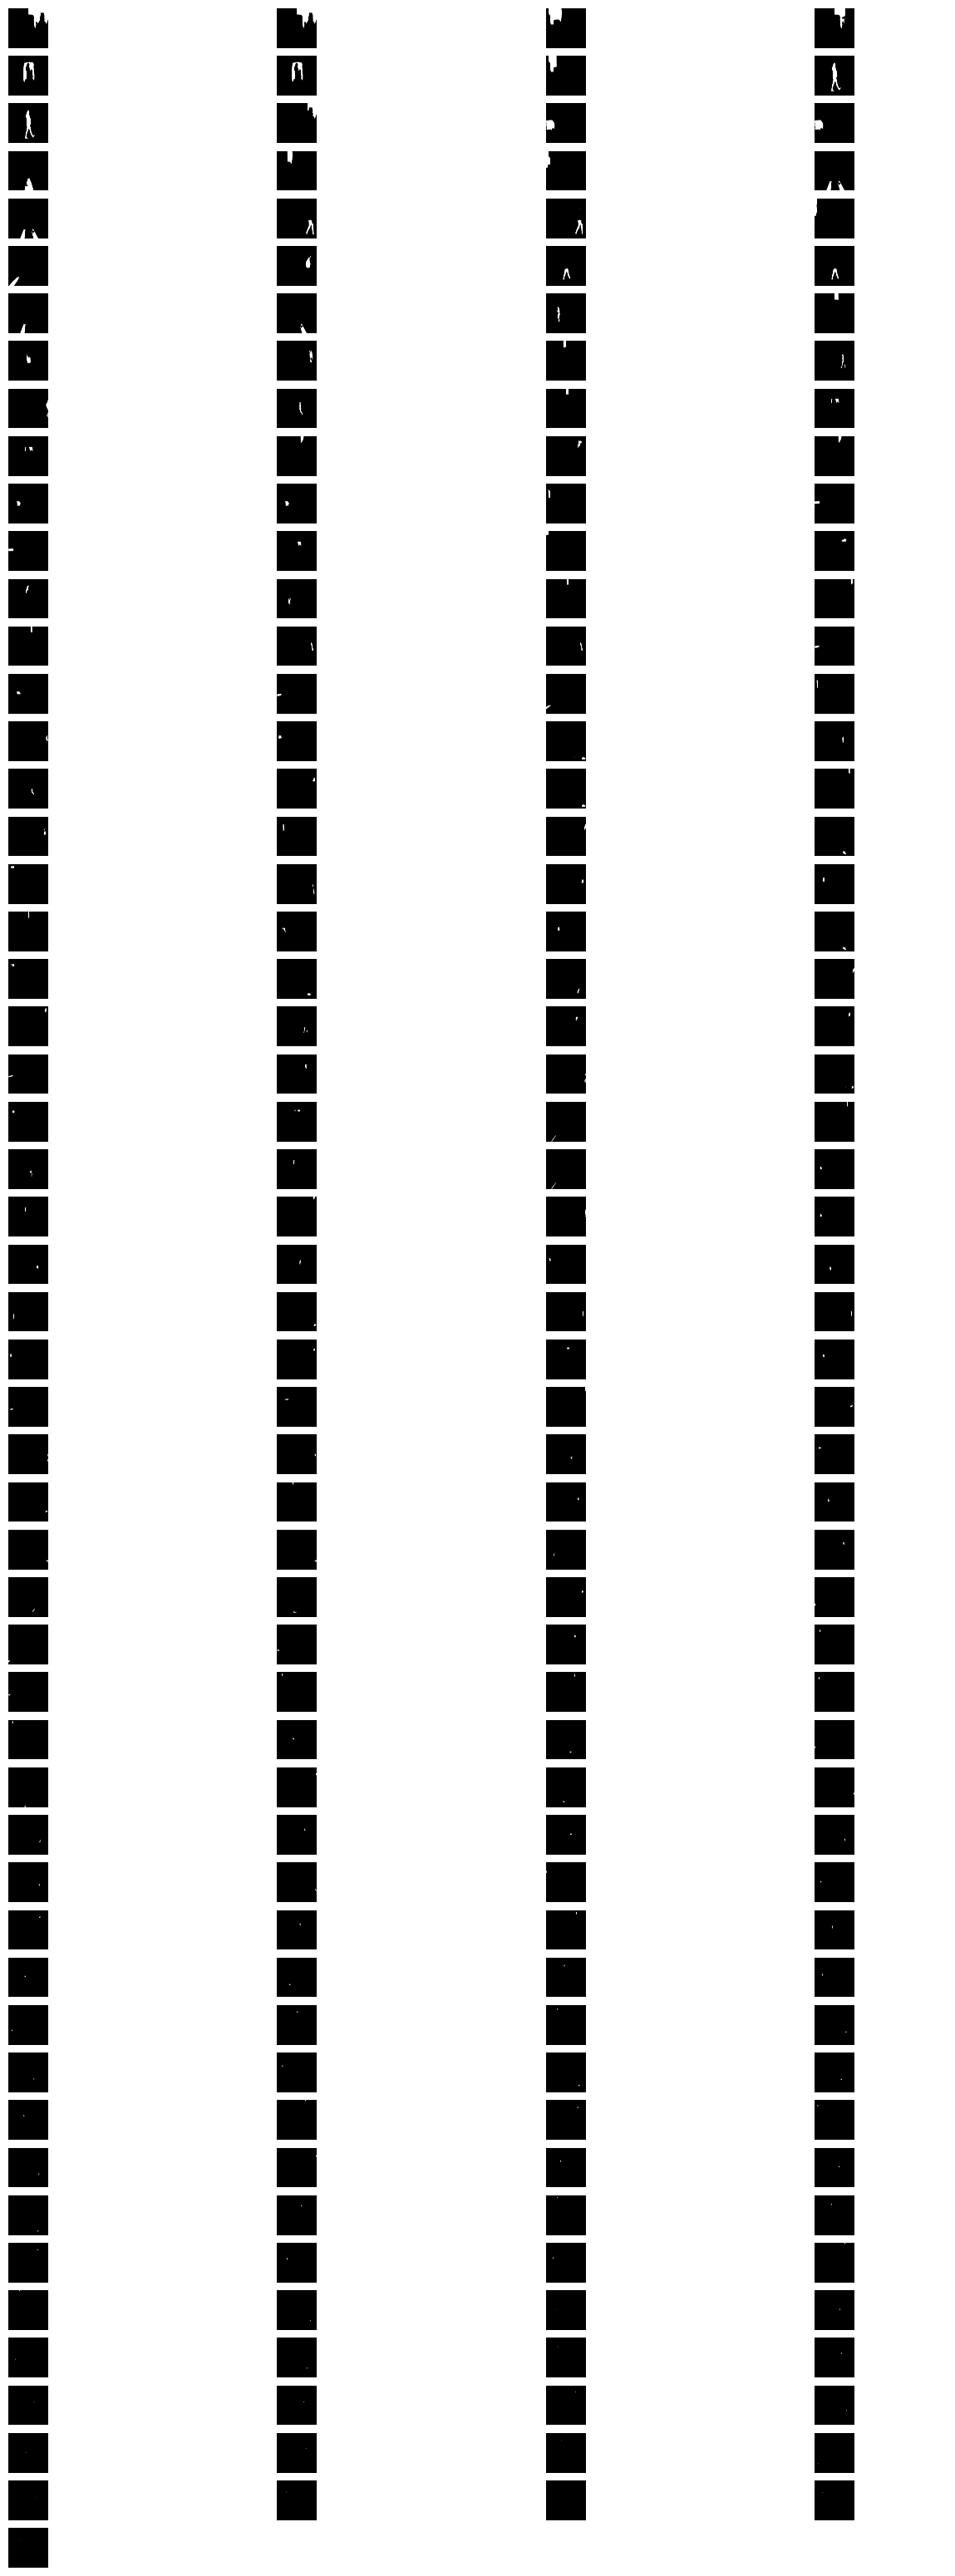

In [209]:
# Draw all msk in a grid
import supervision as sv
sv.plot_images_grid(
    images=segmentations,
    grid_size=(int(len(segmentations)/4+1),4),
    size=(16,40)
)

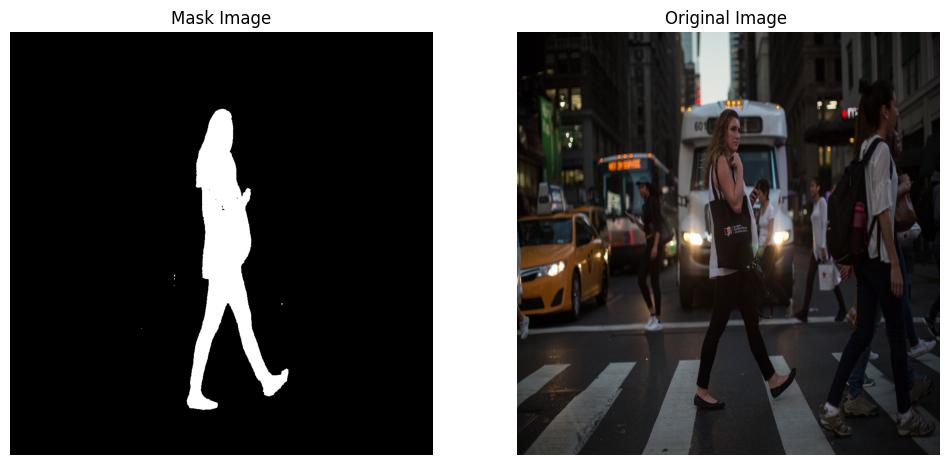

In [208]:
#Draw large or small mask and compare with original image
sv.plot_images_grid(
    images=[segmentations[7],image_bgr],
    grid_size=(1,2),
    titles=['Mask Image', 'Original Image ']
)

<h1>2 Object execution and Storage<h1/>


In [ ]:
import numpy as np
from PIL import Image

def save_top_segmented_objects(image_bgr, result, output_dir, top_n=10):
    os.makedirs(output_dir, exist_ok=True)

    # Sort results by area and select the top_n largest segmentations
    top_results = sorted(result, key=lambda x: x['area'], reverse=True)[:top_n]

    for i, mask in enumerate(top_results):
        # Convert segmentation mask to binary image
        mask_image = np.array(mask['segmentation']).astype(np.uint8) * 255
        mask_image = Image.fromarray(mask_image)

        # Extract object using the mask
        object_image = Image.fromarray(image_bgr)
        object_image.putalpha(mask_image)

        # Save the extracted object
        object_image.save(os.path.join(output_dir, f'object_{i}.png'))

# Call the function
save_top_segmented_objects(image_bgr, result, '/content/project_root/data/segmented_objects')
